# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `/data/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [1]:
%matplotlib inline
import pandas as pd

condemnations_full = pd.read_csv('/data/condemn.txt')
condemnations_full.shape

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (2,8,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(32586, 40)

In [2]:
# Look at the columns to find those with relevant information for a date filter
condemnations_full.columns

Index(['AcctNum', 'PrclErr', 'AddrAdjusted', 'CityBlock', 'Parcel',
       'OwnerCode', 'Handle', 'Parcel9', 'AddrNum', 'AddrSuf', 'StDir',
       'StName', 'StType', 'InspectDate', 'InspectType', 'CondLetterSent',
       'Status', 'OwnerCompany', 'OwnerName', 'OwnerAddr', 'OwnerCity',
       'OwnerState', 'OwnerZIP', 'GeoCityBLockPart', 'Ward00', 'Precinct02',
       'Nbrhd', 'CDADist', 'CDASubDist', 'PoliceDist', 'CensBlock00',
       'AsrNbrhd', 'ImpactCode', 'NLC', 'Parity', 'Inspector', 'Images',
       'FirstDate', 'LastDate', 'UpDateGeo'],
      dtype='object')

In [3]:
condemnations_full["InspectDate"].head

<bound method NDFrame.head of 0        1986-07-10 00:00:00
1        2009-07-23 00:00:00
2        2003-08-06 00:00:00
3        1996-06-17 00:00:00
4        2006-12-20 00:00:00
                ...         
32581    2014-06-24 09:00:00
32582    2013-06-27 23:50:00
32583    2015-02-10 13:53:00
32584    2016-10-18 14:09:00
32585    2013-06-27 23:34:00
Name: InspectDate, Length: 32586, dtype: object>

In [4]:
condemnations_full["InspectDate"] = condemnations_full['InspectDate'].str.slice(stop = 4)

In [5]:
condemnations_full["InspectDate"] = condemnations_full["InspectDate"].astype("string")

In [6]:
condemnations_full['InspectDate'].head

<bound method NDFrame.head of 0        1986
1        2009
2        2003
3        1996
4        2006
         ... 
32581    2014
32582    2013
32583    2015
32584    2016
32585    2013
Name: InspectDate, Length: 32586, dtype: string>

In [7]:
# Create variables for filter - a start date condition and end date condition
date_start = condemnations_full['InspectDate'] >= "1986"
date_end = condemnations_full['InspectDate'] <= "2014"

# Filter the condemnations set and assign to condemnations
condemnations = condemnations_full[date_start & date_end]

In [8]:
condemnations.head

<bound method NDFrame.head of        AcctNum  PrclErr AddrAdjusted  CityBlock  Parcel  OwnerCode  \
0          1.0      0.0        False    3652.00   341.0        1.0   
1          2.0      0.0        False     666.00    80.0        0.0   
2          3.0      0.0        False    3913.01   120.0        1.0   
3          4.0      2.0        False    3744.00   145.0        0.0   
4          5.0      0.0        False    1103.00    30.0        0.0   
...        ...      ...          ...        ...     ...        ...   
32575      NaN      NaN          NaN        NaN     NaN        NaN   
32576      NaN      NaN          NaN        NaN     NaN        NaN   
32581      NaN      NaN          NaN        NaN     NaN        NaN   
32582      NaN      NaN          NaN        NaN     NaN        NaN   
32585      NaN      NaN          NaN        NaN     NaN        NaN   

             Handle      Parcel9 AddrNum AddrSuf  ... CensBlock00 AsrNbrhd  \
0      1.365200e+10  365200341.0    4049          .

In [9]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [10]:
import numpy as np

# Create a pivot data set, aggregating a count of condemnations by type for each year
by_year = pd.pivot_table(data = condemnations, values = "AcctNum", index = "InspectDate", columns = "Status", aggfunc = np.ma.count)

In [11]:
by_year.head

<bound method NDFrame.head of Status            B      L     R      W
InspectDate                            
1986           22.0   12.0  19.0  112.0
1987           91.0   20.0   8.0  361.0
1988          215.0   16.0  15.0  297.0
1989          277.0   15.0  11.0  432.0
1990          119.0   29.0   8.0  322.0
1991          139.0   18.0   4.0  351.0
1992          204.0   30.0   4.0  258.0
1993          185.0   47.0   2.0  193.0
1994          208.0   94.0   5.0  293.0
1995          176.0  127.0   NaN  268.0
1996          214.0  171.0   NaN  794.0
1997          281.0  328.0   NaN  878.0
1998          254.0  343.0   NaN  599.0
1999          272.0  283.0   NaN  826.0
2000          320.0  268.0   NaN  529.0
2001          381.0  262.0   NaN  296.0
2002          383.0  227.0   NaN  317.0
2003          361.0  201.0   NaN  282.0
2004          354.0  204.0   NaN  381.0
2005          410.0  237.0   NaN  345.0
2006          479.0  233.0  20.0  370.0
2007          613.0  262.0   NaN  341.0
2008      

In [12]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


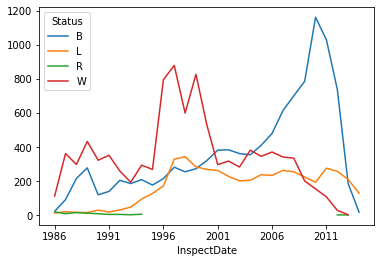

In [13]:
%matplotlib inline
by_year.plot()

---

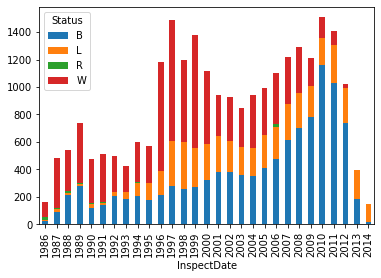

In [14]:
# Create a stacked bar chart
by_year.plot.bar(stacked = True)

I created a stacked bar plot to compare the distributions of "status" across time. There are two distinct periods - a lower number of total condemned properties from 1986-1995 and then an almost-two-fold increase during the period from 1996 to 2011. Over time, the number of "B" and "L" type condemnations increased while the "W" type decreased. The "R" type increase is a minority of condemnations and was not used after 1996 (more easily seen in the multi-line chart above).

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `/data/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [15]:
import pandas as pd
meetings = pd.read_csv("/data/meetings.csv")

In [16]:
meetings.columns

Index(['meeting_uuid', 'meetingTitle', 'meetingId', 'userName', 'user_id',
       'user_tags', 'endTime', 'startTime', 'email', 'participantSeconds',
       'joinDate', 'joinWeek', 'joinMonth', 'participants',
       'participantMinutes', 'meetingDurationMinutes', 'popId', 'userType',
       'billable', 'moderatorLess', 'start_time', 'total_highlights_created',
       'smart_meeting', 'transcription_used',
       'total_transcription_duration_minutes'],
      dtype='object')

In [17]:
meetings['startTime'].head

<bound method NDFrame.head of 0       2020-03-31 21:00:22
1       2020-03-31 20:58:41
2       2020-03-31 20:57:51
3       2020-03-31 20:34:43
4       2020-03-31 20:30:02
               ...         
1183    2020-01-02 15:28:08
1184    2020-01-02 15:01:32
1185    2020-01-02 14:56:32
1186    2020-01-02 14:22:28
1187    2020-01-02 14:14:12
Name: startTime, Length: 1188, dtype: object>

In [18]:
# Create column startDate with the year-month-day
meetings['startDate'] = meetings['startTime'].str[0:10]

In [19]:
meetings['startDate'].head

<bound method NDFrame.head of 0       2020-03-31
1       2020-03-31
2       2020-03-31
3       2020-03-31
4       2020-03-31
           ...    
1183    2020-01-02
1184    2020-01-02
1185    2020-01-02
1186    2020-01-02
1187    2020-01-02
Name: startDate, Length: 1188, dtype: object>

In [20]:
# Convert startDate to a string
meetings['startDate'] = meetings['startDate'].astype("string")

In [21]:
# Check the result of the conversion
meetings['startDate'].head

<bound method NDFrame.head of 0       2020-03-31
1       2020-03-31
2       2020-03-31
3       2020-03-31
4       2020-03-31
           ...    
1183    2020-01-02
1184    2020-01-02
1185    2020-01-02
1186    2020-01-02
1187    2020-01-02
Name: startDate, Length: 1188, dtype: string>

In [22]:
# Create the appropriate row filter for "before" (2/17 - 2/28)
before_month = meetings['startDate'].str[5:7] == "02"

In [23]:
meetings['startDate'].str[8:]

0       31
1       31
2       31
3       31
4       31
        ..
1183    02
1184    02
1185    02
1186    02
1187    02
Name: startDate, Length: 1188, dtype: string

In [33]:
before_startDay = meetings['startDate'].str[8:] >="17"
before_endDay = meetings['startDate'].str[8:] <= "28"

before_filter = before_month & before_startDay & before_endDay

# Create a dataframe for the before timeperiod
before_df = meetings[before_filter]

# Create a new column, setting the value to "before" if it meets the criteria
before_df.loc[:, 'Period'] = 'BEFORE'

/opt/tljh/user/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [34]:
before_df['Period']

515    BEFORE
516    BEFORE
517    BEFORE
518    BEFORE
519    BEFORE
        ...  
689    BEFORE
690    BEFORE
691    BEFORE
692    BEFORE
693    BEFORE
Name: Period, Length: 179, dtype: object

In [35]:
# Create the appropriate row filter for "during" (3/16 - 3/27)
during_month = meetings['startDate'].str[5:7] == "03"
during_startDay = meetings['startDate'].str[8:] >="16"
during_endDay = meetings['startDate'].str[8:] >="27"

during_filter = during_month & during_startDay & during_endDay

In [36]:
# Create a dataframe for the during timeperiod
during_df = meetings[during_filter]

In [37]:
# Create a new column, Period, setting the value to "DURING"
during_df.loc[:, 'Period'] = "DURING"

In [38]:
during_df['Period']

0     DURING
1     DURING
2     DURING
3     DURING
4     DURING
       ...  
72    DURING
73    DURING
74    DURING
75    DURING
76    DURING
Name: Period, Length: 77, dtype: object

In [39]:
# Concatenate the before_df and during_df together by userName
comparison_df = pd.concat([before_df, during_df])

In [40]:
# View the resulting df
comparison_df.head

<bound method NDFrame.head of                                     meeting_uuid  \
515  414292-02eebee8-52d6-4f3b-840b-e1fb921dffa1   
516  414289-2364253f-c894-4175-9fd8-afb78939a7cc   
517  414286-074108a2-1c19-4d9b-b7bc-14240cb1e3ac   
518  414283-8cb3c33d-52e2-4dac-a6d9-f62c2fc2877e   
519  414283-7e8023c1-ffc2-452e-b808-5f3740ca5dad   
..                                           ...   
72   418282-b5a271f5-d2cb-4f9e-a626-63ffff76d2a8   
73   418280-539d4f2f-0a54-4d6e-ab3a-1726972b660e   
74   418277-4994e45e-9f86-46a3-b2ac-c97ca957106f   
75   418274-546cb325-b7ab-4625-ad18-feeffba14773   
76   418270-92688ea2-73e9-4614-bc07-13b6d5a62b7c   

                                          meetingTitle  meetingId  \
515                       Delivery Workbook Touchpoint  423305063   
516                                  Jessica's Meeting  298380081   
517                                    Buxton Proposal  766527572   
518  Catching Up Meeting with Jonathan Westland - RGA   235867006   


In [49]:
# Create a summary data frame, counting the number of meetings in each period by userName
summary = pd.pivot_table(comparison_df, values = "user_id", index = 'userName', 
                         columns = "Period", aggfunc = np.ma.count, fill_value = 0)

In [50]:
# View the resulting dataframe
summary

Period,BEFORE,DURING
userName,,
Drew.Marco,12,3
amit.bhagat,17,9
andrea.bryant.amitechsolutions,5,1
angie.warren,5,1
chris.rogers.amitechsolutions,4,1
eric.keeney,15,10
eric.rodman,4,2
jeff.hatfield.amitechsolutions,13,9
jennifer.patton.amitechs,5,0


In [51]:
# Calculate percent change and assign to a new column - pctChange
summary.loc[:,'pctChange'] = (summary['DURING'] - summary['BEFORE'])/summary['BEFORE']

In [52]:
summary

Period,BEFORE,DURING,pctChange
userName,,,
Drew.Marco,12,3,0.750000
amit.bhagat,17,9,0.470588
andrea.bryant.amitechsolutions,5,1,0.800000
angie.warren,5,1,0.800000
chris.rogers.amitechsolutions,4,1,0.750000
eric.keeney,15,10,0.333333
eric.rodman,4,2,0.500000
jeff.hatfield.amitechsolutions,13,9,0.307692
jennifer.patton.amitechs,5,0,1.000000


In [55]:
summary['pctChange'].mean()

0.47975652508900596

---

In [53]:
assert(len(summary) == 22)

In [54]:
assert(summary['pctChange'].mean().round(2) == 0.92)

AssertionError: 



---



## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  Next week, I'll show you how to **pull** down my comments.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Follow the instruction on the prompt below to either ssave and submit your work, or continue working.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

---

In [56]:
a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git add week12_assignment_2.ipynb
    !git commit -a -m "Submitting the week 12 programming assignment"
    !git push
else:
    print('''
    
OK. We can wait.
''')


Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

 yes


[main 646e9ce] Submitting the week 12 programming assignment
 2 files changed, 1584 insertions(+), 8 deletions(-)
 create mode 100644 week12/week12_assignment_2.ipynb
Counting objects: 5, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 46.79 KiB | 7.80 MiB/s, done.
Total 5 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:ecdmdphd/hds5210-2022.git
   c6164f6..646e9ce  main -> main
